# Task 1 - Prediction using Supervised ML

To predict the percentage of a student based on the study hours

This is a Simple regression task as it involves only two variables

### The Sparks Foundation

# Author - J Prince Kelvin

### Loading Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Dataset

In [2]:
df= pd.read_csv("student_scores.csv")
print("Data has been successfully Imported")
df.head()

Data has been successfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring Data

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking for Null Values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking for Duplicate values

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

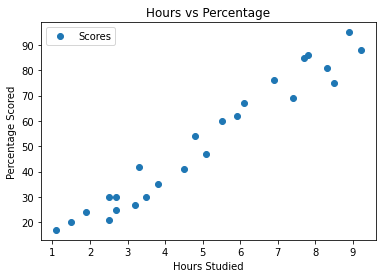

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### Therefore it can be concluded that there is a Linear Relationship between Percentage scored and Hours studied.

## Data Preparation

In [9]:
#Divide the data into "attributes" (inputs) and "labels" (outputs)
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

##  Model Training

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
# Applying Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train,y_train)
print("Training Completed")

Training Completed


In [12]:
print('Coefficients: \n', r.coef_)

Coefficients: 
 [9.91065648]


## Plotting the Regression Line

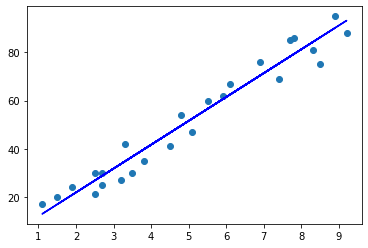

In [13]:
# Plotting the regression line

line = r.coef_*x+r.intercept_

# Plotting for test Data
plt.scatter(x, y)
plt.plot(x, line, color='blue');
plt.show()

#### Therefore it can be concluded that the variables are positively co-related.

## Making Predictions

#### After model training, we need to make some predictions

In [14]:
print(x_test)  # Testing data - In Hours
y_pred = r.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##  Comparing Actual vs Predicted

In [15]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Plotting a Bar Graph to see the difference between Actual and Predicted Value 

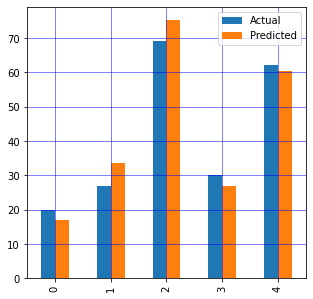

In [16]:
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

## Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


In [18]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = r.predict(test)
print("No of Hours =",hours)
print("Predicted Score =",pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [19]:
from sklearn.metrics import r2_score
print('r2 score:' , metrics.r2_score(y_test,y_pred))

r2 score: 0.9454906892105356


## Conclusion

### According to the Linear Regression model used in prediction if a student studies for 9.25 hours a day, he/she is likely to score 93.69 percent.